In [1]:

import os
import tensorflow as tf 
from keras.layers import Dense , Conv2D , Flatten , MaxPooling2D
from keras.models import Sequential 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib widget 
import cv2
from PIL import Image
import easyocr




In [3]:
dim = []
label = []

dataset = "./adadfarsi/"

folder = os.listdir(dataset)

In [4]:
for file in folder:
    all_file = os.path.join(dataset,file) 

    for photo in os.listdir(all_file):
        
        all_photo = os.path.join(all_file,photo)
        image = cv2.imread(all_photo)
        
        
        
        iimage = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
        
        
        iimage = iimage/255
        
        iiimage = cv2.resize(iimage , (32,32))
        
        dim.append(iiimage)
        
        label.append(int(file)) 
        


In [30]:
x = np.array(dim)
y = np.array(label)

In [55]:
print(x.shape)
print("\n-------------------\n")
print(y.shape)

torch.Size([])

-------------------

torch.Size([])


In [32]:
model = Sequential()

model.add(Conv2D(filters = 10 , kernel_size=  (3,3) , activation= 'relu' , input_shape =  (32 , 32 , 1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters= 5 , kernel_size=(3,3) , activation='relu' , input_shape = (32,32,1) ))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32 , activation='relu'))
model.add(Dense(10))

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

x_train = np.expand_dims(x_train,axis=3)

x_test = np.expand_dims(x_test,axis=3)

x_train.shape

(64000, 32, 32, 1)

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 5)         455       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 5)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 180)               0         
                                                                 
 dense (Dense)               (None, 32)                5

In [35]:
model.compile(optimizer='adam' , loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) , metrics=['accuracy'], run_eagerly=True)

In [36]:
his = model.fit(x_train , y_train , epochs=20 , validation_data=(x_test, y_test))


Epoch 1/20
2000/2000 [==============================] - 76s 37ms/step - loss: 0.2173 - accuracy: 0.9329 - val_loss: 0.0977 - val_accuracy: 0.9706
Epoch 2/20
2000/2000 [==============================] - 74s 37ms/step - loss: 0.0774 - accuracy: 0.9760 - val_loss: 0.0716 - val_accuracy: 0.9794
Epoch 3/20
2000/2000 [==============================] - 75s 37ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0530 - val_accuracy: 0.9833
Epoch 4/20
2000/2000 [==============================] - 77s 38ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0507 - val_accuracy: 0.9847
Epoch 5/20
 171/2000 [=>............................] - ETA: 1:08 - loss: 0.0390 - accuracy: 0.9878

KeyboardInterrupt: 

In [37]:
model.evaluate(x_test,y_test)

500/500 [==============================] - 7s 13ms/step - loss: 0.0395 - accuracy: 0.9879


[0.03946404904127121, 0.9879375100135803]

In [2]:
q = model.save('chillii.h5')

NameError: name 'model' is not defined

In [27]:
from tensorflow.keras.models import load_model
model = load_model('chillii.h5')


In [38]:
base_size_x = 32
base_size_y = 32

In [39]:
def loadimage(imageadd):
    img = np.expand_dims(cv2.resize(cv2.imread(imageadd,0),(base_size_x,base_size_y)),axis=2)
    return img

def show_img(caption , img , destroy=True , show=True , wait_ms=1000):
    if not show:return
    cv2.imshow(caption , img)
    cv2.waitKey(wait_ms)
    if(destroy):
        cv2.destroyAllWindows()
    

In [40]:
def load_adad_file(adad_file , show_process=True):
    images = cv2.imread(adad_file)
    
    show_img("Base image" , images , show= show_process)
    image_base = images
    
    min_ff_count=0
    number_string=""
    
    images = cv2.bitwise_not(images)
    img_gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
    
    img_blured = cv2.blur(img_gray,(5,10))
    show_img("Blured image" , img_blured , show=show_process)
    
    _ , img_bw = cv2.threshold(img_blured , 0 , 255 , cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    show_img("prepared image" , img_bw , show=show_process)
    img_bw = cv2.rotate(img_bw , cv2.ROTATE_90_CLOCKWISE)
    
    show_img("Rotated image" , img_bw , show=show_process)
    
    wifth = img_bw.shape[1]
    height = img_bw.shape[0]
    
    for x in range(height):
        text_pixel = np.where(img_bw[x,:] == 255)[0]
        if text_pixel.size > 0:
            y = (text_pixel[0])
            img_ff = img_bw.copy()
            
            ff_count , ff_image , ff_mask , ff_rect = cv2.floodFill(img_ff , None , (y,x) , 64)
            ff_count , ff_image , ff_mask , ff_rect = cv2.floodFill(img_bw , None , (y,x) , 0)
            show_img("Current digit" , img_ff , False , show=show_process)
            
            img_diff = img_bw - img_ff
            img_diff[img_diff!=0]=255
            show_img("Current digit" , img_diff , False ,show=show_process)
            
            img_digit = img_diff[ff_rect[1]:ff_rect[1]+ff_rect[3],ff_rect[0]:ff_rect[0]+ff_rect[2]]
            img_digit = cv2.rotate(img_digit , cv2.ROTATE_90_COUNTERCLOCKWISE)
            
            img_digit_resized = cv2.resize(img_digit , (base_size_x , base_size_y))
            img_digit_resized = np.array([img_digit_resized ])
            img_digit_resized = img_digit_resized /255
            img_digit_resized  = np.expand_dims(img_digit_resized ,axis=3)
            
            
            out = model.predict(img_digit_resized)
            the_no = np.argmax(out[0])
            print(the_no)
            if ff_count>min_ff_count:
                number_string = number_string + str(the_no)
                
            show_img("Current digit" , img_digit , False , show=show_process)
            
    zire_adad = image_base[0:50].copy()
    np.ndarray.fill(zire_adad[0:50] , 255)
    image_base = np.append (image_base , zire_adad , axis=0)
    
    cv2.putText(image_base ,"Adad : " + number_string , (10 , image_base.shape[0]-15) , cv2.FONT_HERSHEY_SIMPLEX , 0.75 , (0,0,0) , 1 , cv2.LINE_AA)
    
    cv2.destroyAllWindows()
    show_img("Final difit" , image_base , show=show_process)
    print(number_string)
    return (number_string , image_base)
    
            
    
    
    

In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
%matplotlib widget

WARNING  Python>=3.10 is required, but Python==3.8.8 is currently installed 


In [5]:
import torch
import torchvision

print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)


PyTorch Version: 2.4.1+cpu
Torchvision Version: 0.19.1+cpu


In [3]:
from realesrgan import real

ModuleNotFoundError: No module named 'torchvision.transforms.functional_tensor'

تصویر با وضوح بالاتر ذخیره شد!

0: 160x224 1 L, 113.5ms
Speed: 1.0ms preprocess, 113.5ms inference, 1.0ms postprocess per image at shape (1, 3, 160, 224)
Bounding box: x=385.3516845703125, y=387.45074462890625, w=207.15121459960938, h=51.555419921875


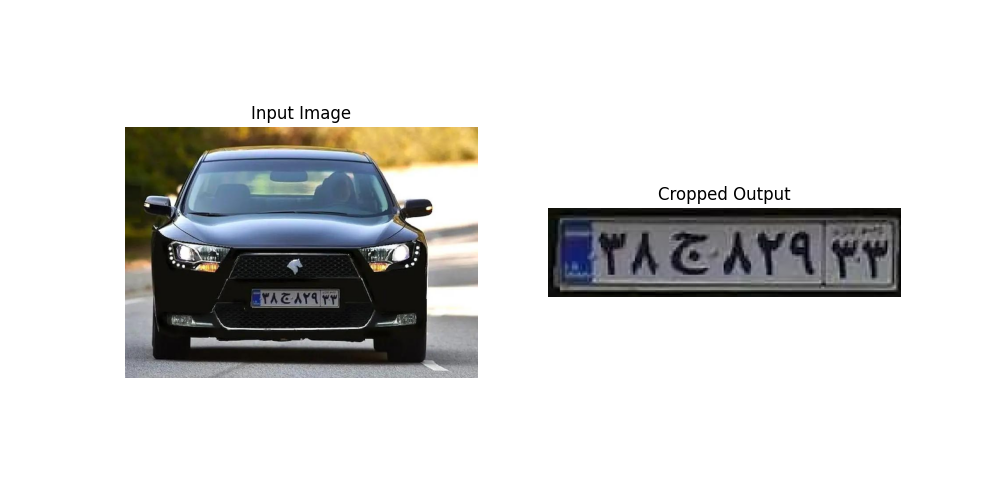

In [18]:
 


model = YOLO("plk_khan/YOLOv8m_Iran_license_plate_detection.pt")


file_path = "ch.webp"

from PIL import Image, ImageEnhance

# بارگذاری تصویر
image = Image.open(file_path)

# بهبود وضوح
enhancer = ImageEnhance.Sharpness(image)
enhanced_image = enhancer.enhance(2)  # عدد بزرگتر وضوح بیشتر

# ذخیره تصویر خروجی
enhanced_image.save("enh.jpg")
print("تصویر با وضوح بالاتر ذخیره شد!")




baz = Image.open(file_path)
baz.save("size.png")

file_path = "enh.jpg"


results = model([file_path])

# Read the input image
img = cv2.imread(file_path)


for result in results:
    maxa = result.boxes.conf.argmax()  # Get the index of the highest confidence box
    x, y, w, h = result.boxes.xywh[maxa]  # Extract coordinates and size
    print(f"Bounding box: x={x}, y={y}, w={w}, h={h}")
    
    # Crop the detected object from the image
    crop_img = img[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]

    # Convert the image from BGR to RGB for display with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    crop_img_rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    
    
    
    
    
    
    

    
    plt.figure(figsize=(10, 5))

   
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Input Image")
    plt.axis("off")

   
    plt.subplot(1, 2, 2)
    plt.imshow(crop_img_rgb)
    plt.title("Cropped Output")
    plt.axis("off")

    plt.show()

In [14]:
reader = easyocr.Reader(['fa'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [40]:
print(type( cv2.blur(crop_img_rgb ,(5,20)) ))
print(type(crop_img_rgb))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
#crop_img_rgb = cv2.blur(crop_img_rgb , (5,10))
plate_text = reader.readtext(crop_img_rgb)
print(type(plate_text))
print(plate_text)

<class 'list'>
[[[[25, 9], [185, 9], [185, 45], [25, 45]], '٣ ٣٨٤٨٢٩', 0.767501000230718]]


In [49]:


hey = load_adad_file('pelak0000.png' , show_process=True)
hey

1/1 [==============================] - 0s 67ms/step
1
1/1 [==============================] - 0s 18ms/step
2
1/1 [==============================] - 0s 13ms/step
7
1/1 [==============================] - 0s 15ms/step
0
1/1 [==============================] - 0s 20ms/step
3
1/1 [==============================] - 0s 19ms/step
6
1/1 [==============================] - 0s 19ms/step
5
1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 20ms/step
1
1/1 [==============================] - 0s 24ms/step
1
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 25ms/step
0
1/1 [==============================] - 0s 20ms/step
1
1/1 [==============================] - 0s 20ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1270365111000100


('1270365111000100',
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
       

In [7]:
import tkinter as tk 
from tkinter import filedialog 
from PIL import Image , ImageTk

In [ ]:
import tkinter as tk 
from tkinter import filedialog 
from PIL import Image , ImageTk 

def open_file_dialog() :
    file_types = [('All image files' , '*.png;*.jpg;*.bmp') , ('PNG Files' , '*.png') , ('JPEG Files' , '*.jpg') , ('Bitmap Files' , '*.bmp')]
    file_path = filedialog.askopenfilename(filetypes=file_types)
    if file_path:
        lbl_no.config(text="working... ")
        

In [ ]:
images = cv2.imread(adad_file)
images = cv2.bitwise_not(images)
img_gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
    
img_blured = cv2.blur(img_gray,(5,10))
_ , img_bw = cv2.threshold(img_blured , 0 , 255 , cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bw = cv2.rotate(img_bw , cv2.ROTATE_90_CLOCKWISE)
img_digit = cv2.rotate(img_digit , cv2.ROTATE_90_COUNTERCLOCKWISE)
            
img_digit_resized = cv2.resize(img_digit , (base_size_x , base_size_y))
img_digit_resized = np.array([img_digit_resized ])
img_digit_resized = img_digit_resized /255
img_digit_resized  = np.expand_dims(img_digit_resized ,axis=3)

In [7]:
img_pelak0 = cv2.imread('pelak0000.png',0)
sm = 90 - np.sum(img_pelak0,axis=0,keepdims=True)/255

In [56]:
print(x1.shape)
print(np.array(img_digit_resized).shape)

(1, 32, 32, 1, 1)
(1, 32, 32, 1)


In [57]:
img_pelak = cv2.imread('pelak0000.png')
img_pelak = cv2.bitwise_not(img_pelak)


ret,img_pelak = cv2.threshold(img_pelak,127,255,cv2.THRESH_BINARY)


pelak = img_pelak0.copy()
xi = 0
xi1 = 0
xi2 = 0


flag1 = False
flag2 = False

finall = 0
for i in sm[0]:
    xi += 1

    if i > 9 and flag1==True and flag2 == False:
        
        flag2 = True

    if i < 5:
        cv2.line(pelak,(xi,0),(xi,90),(0,0,0),1)
        
        if flag1 == False:
            xi1 = xi
        
        if flag2 == True:
            xi2 = xi
            flag2 = False
            flag1 = False
            img1 = img_pelak[:,xi1:xi2]
            
            
            x1 = np.empty((1,32,32,1))
            img_digit_resized = cv2.resize(img1 , (base_size_x , base_size_y))
            img_digit_resized = cv2.cvtColor(img_digit_resized, cv2.COLOR_BGR2GRAY)
            img_blured = cv2.blur(img_digit_resized,(5,10))
            img_digit_resized = np.array(img_digit_resized)
            img_digit_resized = img_digit_resized /255
            img_digit_resized  = np.expand_dims(img_digit_resized ,axis=3)
            x1 = np.append(x1,img_digit_resized,axis=0)
            natije = model.predict(x1)
            finall = finall * 10 + int(natije)

            
            
            cv2.imshow('ax',img1)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

            xi1 = xi2

        flag1 = True
print(finall)

AxisError: axis 3 is out of bounds for array of dimension 3

In [24]:

#New way !test
for j in range(1,8000):
    img = cv2.imread(f"adadfarsi/0/0 ({j}).png")
    img = cv2.resize(img , (32,32))
    
    pic = np.array(img)
    pic = pic[:,:,0]
    pic = pic /255
    
    pic = np.expand_dims(pic,axis=3)
    
    x = np.append(x , [pic] , axis=0)
    
        

AxisError: axis 3 is out of bounds for array of dimension 3